In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_update=pd.read_csv('train_updates_20220929.csv')
test


In [115]:
train_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.corr()

In [67]:
train.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')

In [116]:
train.drop(['data_source'],axis=1,inplace=True)
train

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [117]:
train.isnull().sum()

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

In [118]:
train['pH'] = train['pH'].fillna(train['pH'].mean())

Text(0.5, 1.0, 'Heatmap for correlation between columns of training data')

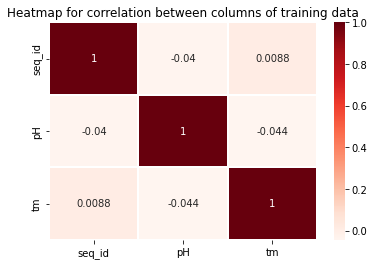

In [119]:
sns.heatmap(train.corr(),linewidths=1,cmap=plt.cm.Reds, annot=True);

plt.title('Heatmap for correlation between columns of training data')

In [82]:
import re  
search ="A"
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino_acid in search_amino:
     train[amino_acid]=train['protein_sequence'].str.count(amino_acid,re.I)

In [ ]:
train.drop(['protein_sequence'],axis=1,inplace=True)
train

In [84]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(train)

In [ ]:
test.describe()

In [85]:
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino in search_amino:
    test[amino]=test['protein_sequence'].str.count(amino,re.I)

In [86]:
test.drop(['data_source','protein_sequence'],axis=1,inplace=True)
test.head()

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,31390,8,22,4,15,8,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
1,31391,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2,31392,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
3,31393,8,22,5,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
4,31394,8,22,4,15,7,11,19,0,6,...,0,19,17,13,3,18,8,13,6,6


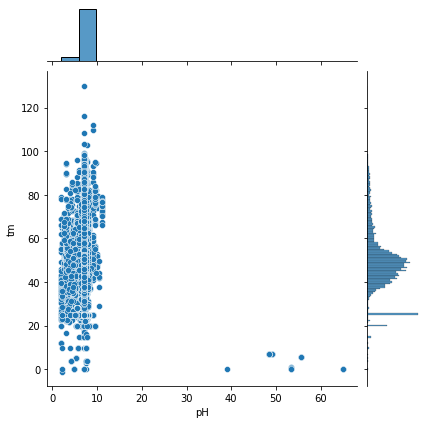

In [87]:

sns.jointplot(data=train, x="pH", y="tm")

In [88]:
train['pH'].value_counts()

7.00     26748
7.50       576
8.00       502
3.00       288
2.70       274
         ...  
3.14         1
2.53         1
2.81         1
39.00        1
10.30        1
Name: pH, Length: 115, dtype: int64

In [89]:
train['tm'].value_counts()

25.0     1472
20.0      561
50.0      200
45.0      178
49.7      176
         ... 
98.1        1
97.6        1
92.7        1
1.2         1
103.0       1
Name: tm, Length: 770, dtype: int64

In [90]:
x=train.drop(['tm'],axis=1)
y=train['tm']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.20,random_state=42)

In [93]:
x_train.shape,y_train.shape

((25112, 22), (25112,))

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [96]:
rf = RandomForestRegressor()

In [ ]:
from pprint import pprint

pprint(rf.get_params())

In [99]:
from scipy.stats import randint

random_grid={'max_depth':list(np.arange(10, 100, step=10)),
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [100]:
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc9f08549d0>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc9f1deb940>,
 'min_samples_split': array([2, 4, 6, 8]),
 'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])}


In [101]:

rf = RandomForestRegressor(random_state = 42)
 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv =3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc9f08549d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc9f1deb940>,
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [103]:
y_predict= rf_random.predict(x_valid)
y_predict.shape

(6278,)

In [104]:
test.shape

(2413, 22)

In [ ]:
# Density Plot and Histogram of all arrival delays
sns.distplot(y_valid, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Density Plot and Histogram of all arrival delays
sns.distplot(y_predict, hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4})


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predict)))

In [50]:
submission =pd.DataFrame()

In [107]:
submission['seq_id']=test['seq_id']

In [108]:
submission['tm'] =rf_random.predict(test)

In [ ]:
submission.to_csv('submission.csv',index=False)
submission

In [110]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/content/submission.csv